# Hardware platform design and usage
**Attention! Save all your files and designs in your home folder!**

## Communication between processor and FPGA - Hardware part
1. Run Vivado HLx and create a new project.
1. Do not add sources at this point, use ZeadBoard/Zybo as a part for your project (check board revision).
1. Create new block design and add IP: *ZYNQ7 Processing System*.

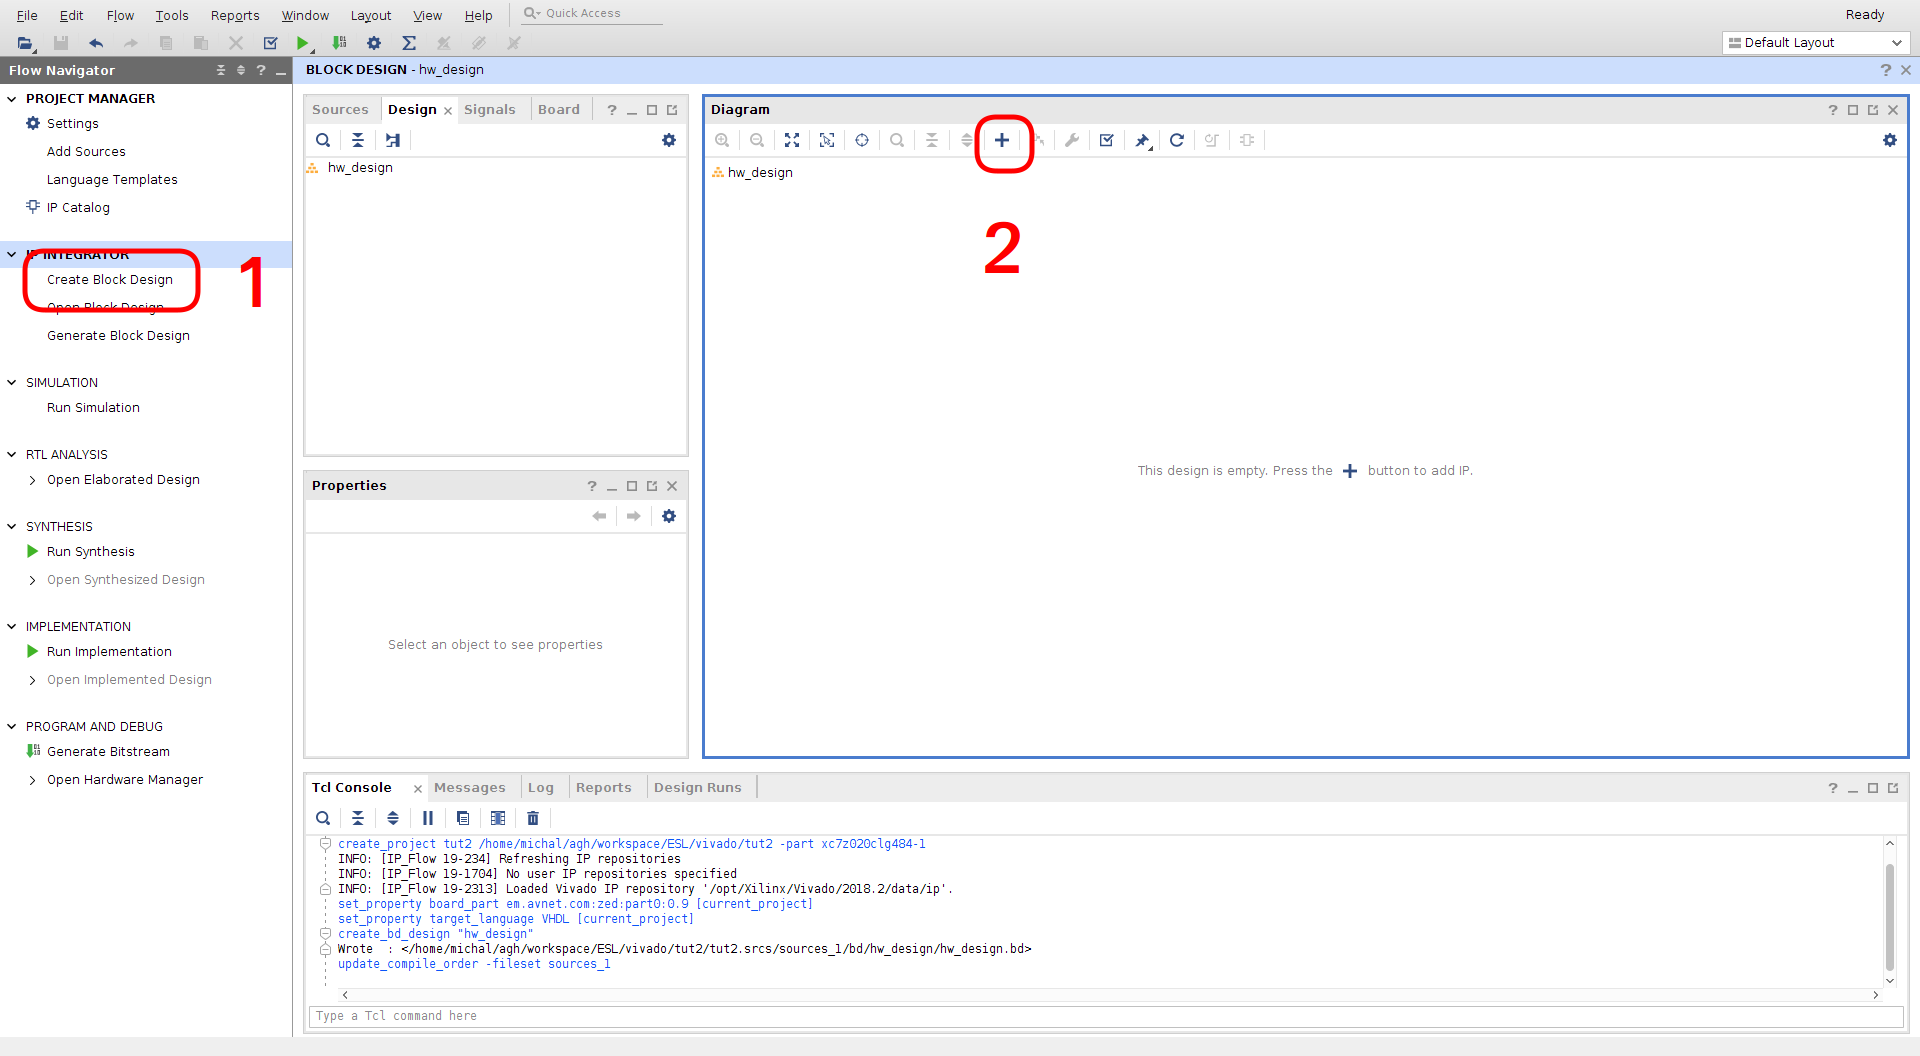

In [1]:
from IPython.display import Image
Image(filename='img/pic1.png')

4. Customice IP block, chose *Presets -> ZedBoard* for ZedBoard or use following preset file for Zybo:
[ZYBO_C.tcl](https://raw.githubusercontent.com/Digilent/ZYBO/master/Resources/Preset/ZYBO_C.tcl)

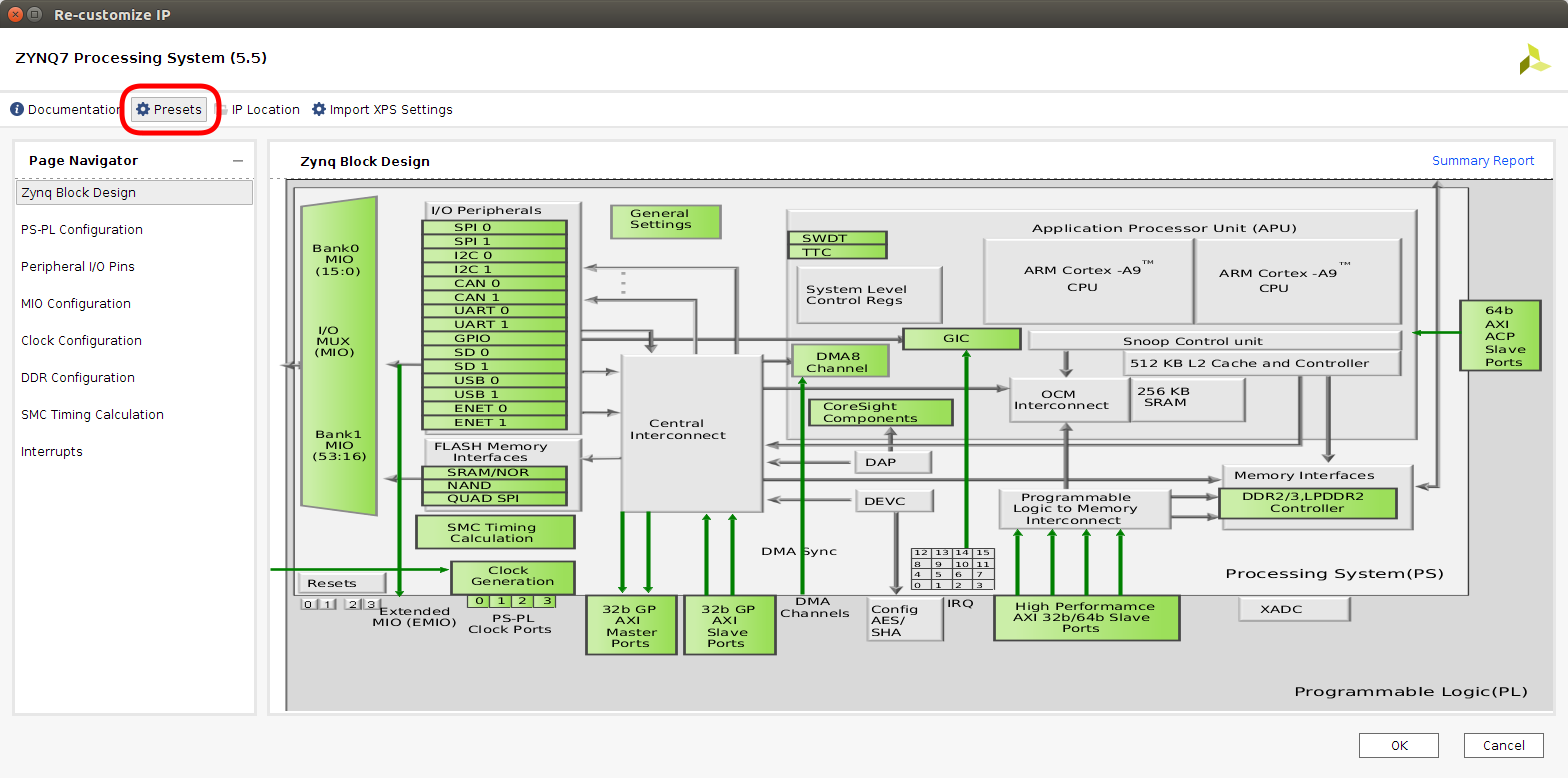

In [2]:
from IPython.display import Image
Image(filename='img/pic2.png')

5. Add another IP: *AXI Stream FIFO*, customize it and deselect *Enable Transmit Control*. Other settings leave default (Transmit/Receive Fifo Depth parameters will affect the maximum size of a data package).
1. Click *Run Block Automation*, all options should be selected ald left default.
1. Click *Run Connection Automation*, all options should be selected ald left default.
1. AXI Stream Fifo will controll data transmission between Processing System and Programmable Logic. Port AXI_STR_TDX in PS -> PL direction, port AXI_STR_RXD in PL -> PS direction. First, create a simple loopback to check that the communication is working correctly. Connect output of the queue to the input.

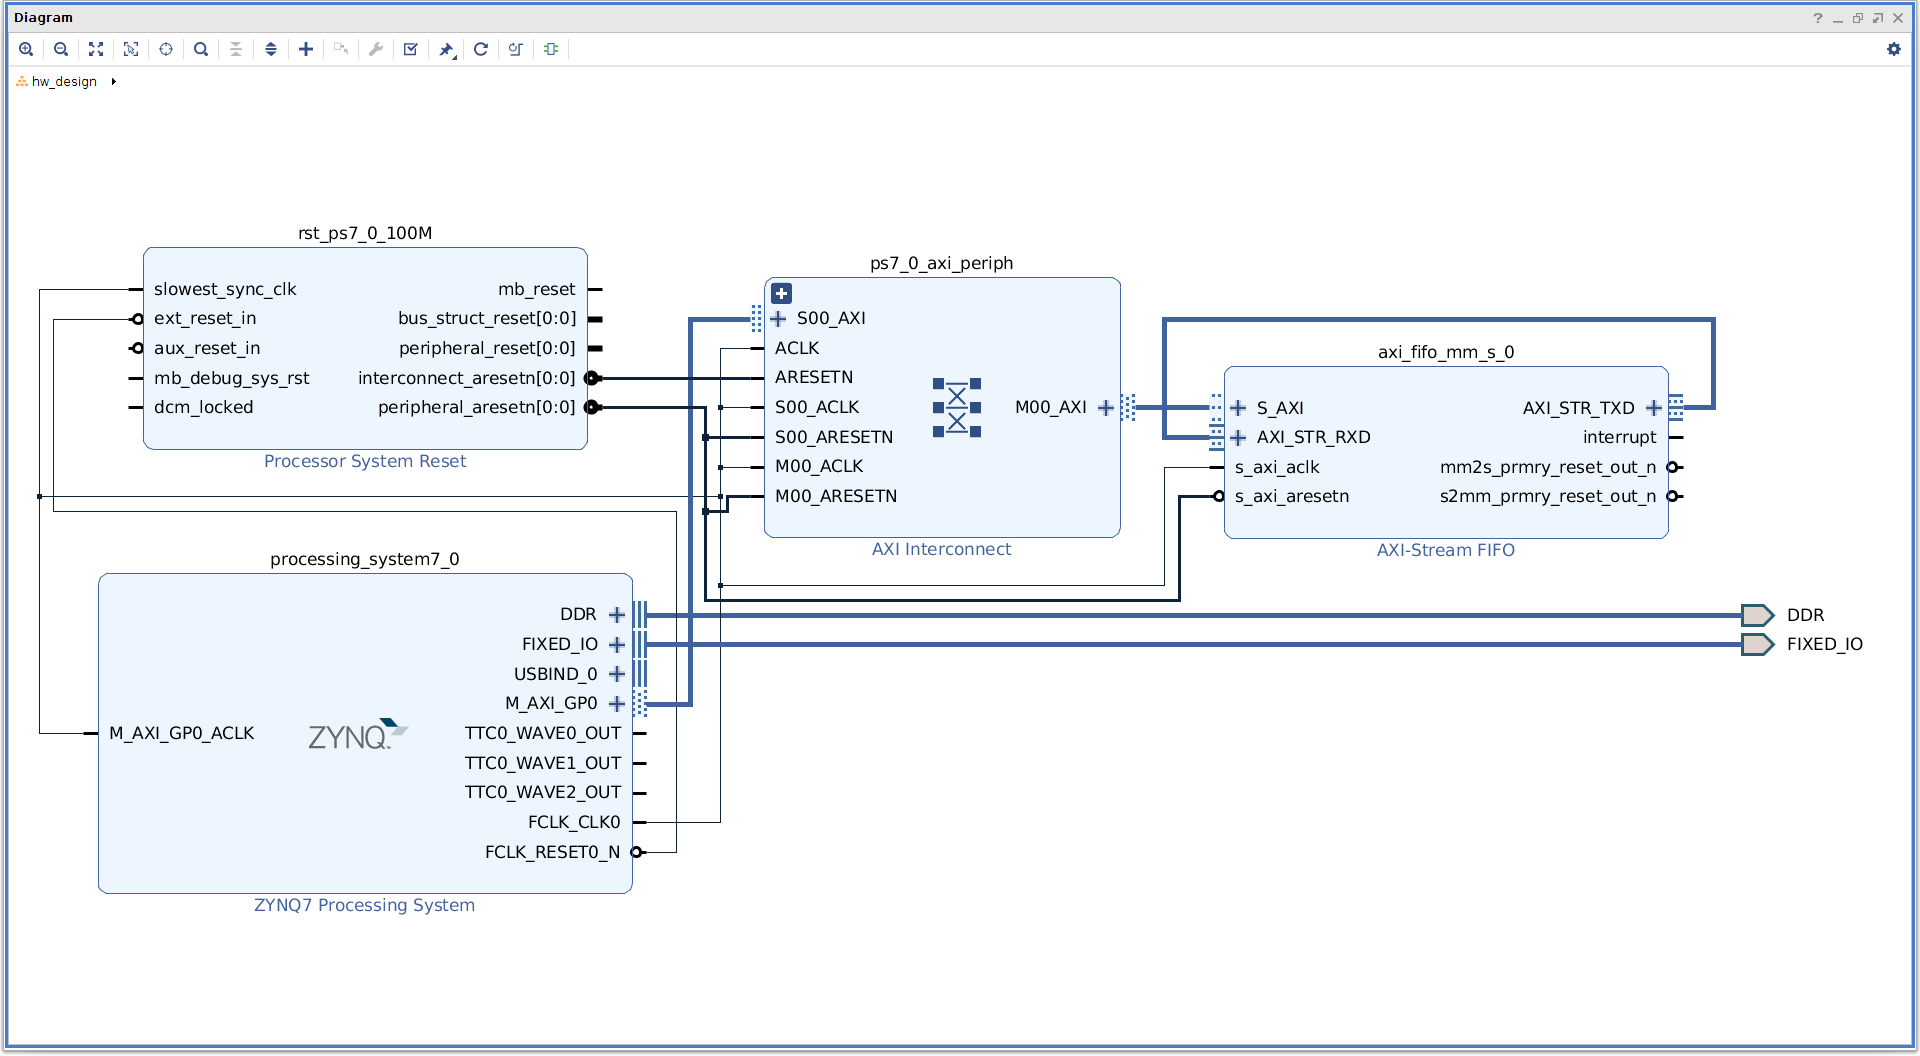

In [3]:
from IPython.display import Image
Image(filename='img/pic3.png')

9. To use a block design you have to create an *HDL Wrapper*, you can do this using right mouse button menu on the design file in sources tab (use auto-update option).
1. *Generate Bitstream*.

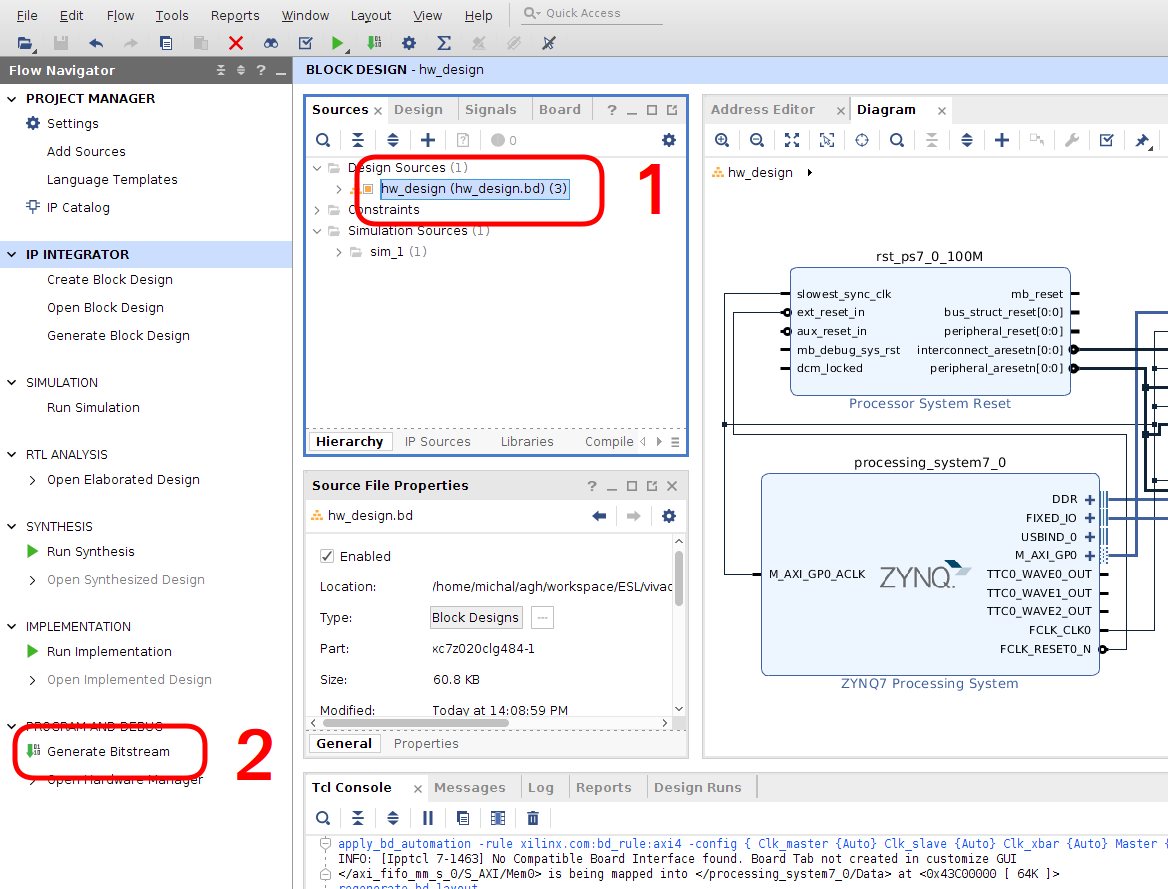

In [4]:
from IPython.display import Image
Image(filename='img/pic4.png')

Synthesis and Implementation may take a while...

11. After the generation is finished, export hardware using *File -> Export* menu, include *bitstream*.
1. Hardware part is now ready, run SDK using *File -> Launch SDK*

## Communication between processor and FPGA - Software part
After start, SDK will automatically import hardware specification.
1. Create new application project using *File -> New* menu.
1. Use standalone OS platform, your newly created hardware platform, C++ language, and create a new Board Support Package.

*system.mss* file in bsp contains many useful peripheral drivers examples. All IP added to the HW design will be automatically included.
Xilinx examples are provided in C language, during this class we will use our own C++ wrappers for convenience.

3. First thing is to say *Hello World*, SDK however, do not provide initialization files with empty projects. It's the easiest to use files generated for C Hello World template project. Create a new application project this time for C language and existing BSP.
1. Copy platform files from C project to C++ project: *platform.h, platform.c, platform_config.h* (Ctrl+C/V on project explorer). After that, C project will no longer be needed, you can delete it.
1. Use the code below, it will write to the console.

main.cc:

    #include "xparameters.h"
    #include "platform.h"
    #include "xil_printf.h"

    int main() {
        init_platform();
        xil_printf("Hello World\r\n");
        cleanup_platform();
        return 0;
    }

6. Now we want to run our program on the board. Connect ZeadBoard to power supply and both USB ports or only USB for Zybo.
1. Check that MIO2-6 jumpers are all conneted to GND for ZedBoard and JP5 to JTAG for Zybo.
1. Turn on the power.
1. Program FPGA. LED on the board will indicate success.

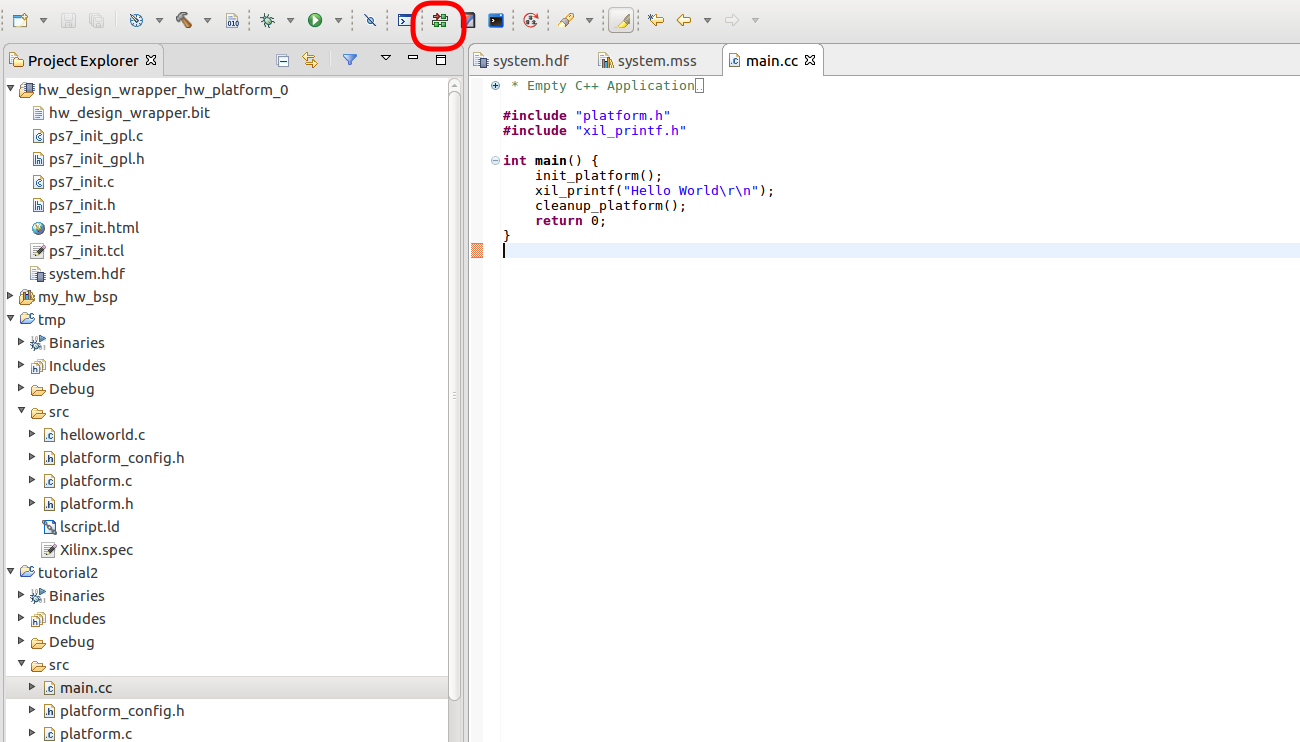

In [5]:
from IPython.display import Image
Image(filename='img/pic5.png')

10. Open terminal of your choice (for example putty) and connect to the board (baud 115200, 8 data bits, 1 stop bit, no parity).
1. Run the program, using right muse button menu on the project and clicking *Run As -> Launch on Hardware (System Debugger)*, if you can see the output, communication works correctly :)
1. Now its time to check communication with FPGA. Use *AxiFifoMM* from git repository (lib/sw).

The code below presents basic usage:

    AxiFifoMM fifo(XPAR_AXI_FIFO_0_DEVICE_ID);
    constexpr unsigned data_words_num = 64;
	std::vector<uint32_t> in_buff;
	for (unsigned i = 0; i < data_words_num; i++) {
		in_buff.push_back(i);
	}
	fifo.write(in_buff);
	auto out_buff = fifo.read();
	for (unsigned i = 0; i < out_buff.size(); i++) {
		xil_printf("out_buff[%d] = %d\n\r", i, out_buff[i]);
	}

## Simple sumator
1. Next step is to insert some functionality to FPGA, instead of loopback you will use module genrated from myHDL.
1. Create a new project and copy from *git repo/lib/hw* all folders to *src* directory in your design.
1. Copy also files from *git repo/examples/myhld_sum*
1. You can see an example AXI4-Stream handshake, feel free to modify code function.
1. Run the testbench and verify that the code is running corectly. Verify interface using waveform.
1. Use generated sources in Vivado project. Add design sources (using *Add sources* button in *PROJECT MENAGER* or plus button in sources), choose both *vhd* file library package. Do not copy sources into project, that way Vivado will see later changes, it will ask to refresh.
1. Add your module to the block design, right click on an empty field in the block design and chose *Add Module...*.
1. Connect your module instead of loopback, don't forget about clock and reset.
1. Save the project and generate bitstream.
1. When bit is ready, export hardware.
1. SDK will notice the change and update BSP (sometimes update process is not full and you need to manually regenerate BPS sources, using right mouse button menu on BSP project)
1. Check if the program is working correctly.

### When you finish with the summator you can play with your own functions